In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df=pd.merge(city_data_df, ride_data_df, on='city',how="left")

# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

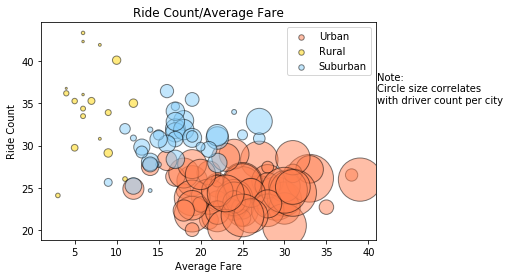

In [11]:
# Obtain the x and y coordinates for each of the three city types

# Get the city types seperated
city_types = combined_data_df.groupby('type')
urban = city_types.get_group('Urban')
rural = city_types.get_group('Rural')
suburban = city_types.get_group('Suburban')

# Average Fare ($) Per City
suburban_average_fare = suburban.groupby('city')['fare'].mean()
rural_average_fare = rural.groupby('city')['fare'].mean()
urban_average_fare = urban.groupby('city')['fare'].mean()

#Total Number of Rides Per City
rural_total_rides = rural.groupby('city')['ride_id'].count()
suburban_total_rides = suburban.groupby('city')['ride_id'].count()
urban_total_rides = urban.groupby('city')['ride_id'].count()

#Total Number of Drivers Per City

rural_total_drivers=rural.groupby('city')['driver_count'].sum()
suburban_total_drivers=suburban.groupby('city')['driver_count'].sum()
urban_total_drivers=urban.groupby('city')['driver_count'].sum()

# Build the scatter plots for each city types
plt.scatter(urban_total_rides,urban_average_fare,urban_total_drivers,facecolor='Coral',edgecolor='Black',alpha=0.5,label='Urban')
plt.scatter(rural_total_rides,rural_average_fare,rural_total_drivers,facecolor='Gold',edgecolor='Black',alpha=0.5,label='Rural')
plt.scatter(suburban_total_rides,suburban_average_fare,suburban_total_drivers,facecolor='LightSkyBlue',edgecolor='Black',alpha=0.5,label='Suburban')

# Incorporate the other graph properties
plt.title("Ride Count/Average Fare")
plt.xlabel("Average Fare")
plt.ylabel("Ride Count")

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(41, 35, s='Note:\nCircle size correlates \nwith driver count per city', fontdict=None, withdash=False)

# Save Figure
plt.savefig("Images/ridesxcitytypescatter.png")


## Total Fares by City Type

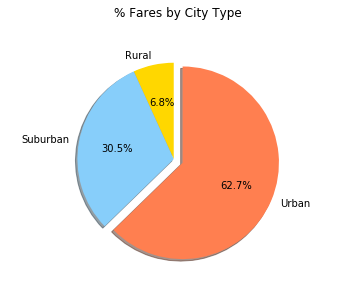

<Figure size 432x288 with 0 Axes>

In [3]:
# Calculate Type Percents
bigsum=city_types['fare'].sum()
ruralsum=rural['fare'].sum()
subsum=suburban['fare'].sum()
urbsum=urban['fare'].sum()
total_rides=bigsum.sum()
pctrural = ruralsum/total_rides
pctsub = subsum/total_rides
pcturban = urbsum/total_rides

# Build Pie Chart
labels = 'Rural','Suburban','Urban'
sizes = [pctrural, pctsub, pcturban]
explode = [0,0,0.1]
colors="Gold","LightSkyBlue","Coral"
plt.pie(sizes, labels=labels,explode=explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title('% Fares by City Type\n\n')
# Show Figure
plt.show()
# Save Figure
plt.savefig("Images/faresxcitytypepie.png")

## Total Rides by City Type

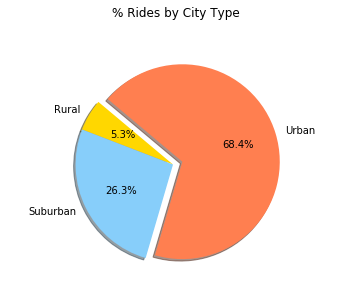

<Figure size 432x288 with 0 Axes>

In [4]:
# Calculate Type Percents
bigsumr=city_types['ride_id'].count()
ruralsumr=rural['ride_id'].count()
subsumr=suburban['ride_id'].count()
urbsumr=urban['ride_id'].count()
total_ridesr=bigsumr.sum()
pctruralr = ruralsumr/total_ridesr
pctsubr = subsumr/total_ridesr
pcturbanr = urbsumr/total_ridesr

# Build Pie Chart
labels = 'Rural','Suburban','Urban'
sizes = [pctruralr, pctsubr, pcturbanr]
explode = (0, 0, 0.1)
colors="Gold","LightSkyBlue","Coral"
plt.pie(sizes, labels=labels, explode=explode, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('% Rides by City Type \n\n')
# Show Figure
plt.show()
# Save Figure
plt.savefig("Images/ride_idxcitytypepie.png")




## Total Drivers by City Type

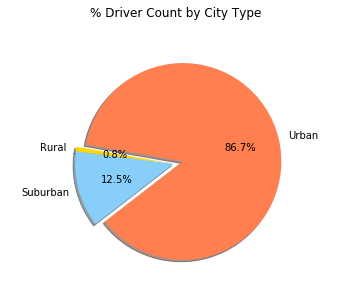

<Figure size 432x288 with 0 Axes>

In [20]:
# Calculate Type Percents
bigsumd=city_types['driver_count'].sum()
ruralsumd=rural['driver_count'].sum()
subsumd=suburban['driver_count'].sum()
urbsumd=urban['driver_count'].sum()
total_ridesd=bigsumd.sum()
pctrurald = ruralsumd/total_ridesd
pctsubd = subsumd/total_ridesd
pcturband = urbsumd/total_ridesd

# Build Pie Chart
labels = 'Rural','Suburban','Urban'
sizes = [pctrurald, pctsubd, pcturband]
explode = (0, 0, 0.1)
colors="Gold","LightSkyBlue","Coral"
plt.pie(sizes, labels=labels, explode=explode, colors=colors,autopct="%1.1f%%", shadow=True, startangle=170)
plt.axis('equal')
plt.title('% Driver Count by City Type \n\n')
# Show Figure
plt.show()
# Save Figure
plt.savefig("Images/driver_countxcitytypepie.png")